In [21]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [22]:
path_users = 'Data/raw/users.csv'
path_viewing = 'Data/raw/viewing_sessions.csv'
path_content = 'Data/raw/content.json'

df_users = pd.read_csv(path_users)
df_viewing = pd.read_csv(path_viewing)


with open(path_content, 'r') as f:
    data_content = json.load(f)


movies_list = data_content['movies']
series_list = data_content['series']
df_movies = pd.DataFrame(movies_list)
df_series = pd.DataFrame(series_list)

print("DataFrames cargados exitosamente")

DataFrames cargados exitosamente


In [23]:
print("--- Información de df_users ---")
df_users.info()
print("\n--- Información de df_viewing ---")
df_viewing.info()
print("\n--- Información de df_movies ---")
df_movies.info()
print("\n--- Información de df_series ---")
df_series.info()

--- Información de df_users ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 5000 non-null   object 
 1   age                     5000 non-null   int64  
 2   country                 5000 non-null   object 
 3   subscription_type       5000 non-null   object 
 4   registration_date       5000 non-null   object 
 5   total_watch_time_hours  5000 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 234.5+ KB

--- Información de df_viewing ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222785 entries, 0 to 222784
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   session_id              222785 non-null  object 
 1   user_id                 222785 non-null  object 
 2   content_

In [24]:
print("\n--- Verificación de valores nulos ---")
print("Valores nulos en df_users:")
print(df_users.isnull().sum())
print("\nValores nulos en df_viewing:")
print(df_viewing.isnull().sum())
print("\nValores nulos en df_movies:")
print(df_movies.isnull().sum())
print("\nValores nulos en df_series:")
print(df_series.isnull().sum())


--- Verificación de valores nulos ---
Valores nulos en df_users:
user_id                   0
age                       0
country                   0
subscription_type         0
registration_date         0
total_watch_time_hours    0
dtype: int64

Valores nulos en df_viewing:
session_id                0
user_id                   0
content_id                0
watch_date                0
watch_duration_minutes    0
completion_percentage     0
device_type               0
quality_level             0
dtype: int64

Valores nulos en df_movies:
content_id           0
title                0
genre                0
duration_minutes     0
release_year         0
rating               0
views_count          0
production_budget    0
dtype: int64

Valores nulos en df_series:
content_id              0
title                   0
genre                   0
seasons                 0
episodes_per_season     0
avg_episode_duration    0
rating                  0
total_views             0
production_budget      

In [25]:
print("--- Primeras 5 filas de df_users ---")
print(df_users.head())
print("\n--- Primeras 5 filas de df_viewing ---")
print(df_viewing.head())
print("\n--- Primeras 5 filas de df_movies ---")
print(df_movies.head())
print("\n--- Primeras 5 filas de df_series ---")
print(df_series.head())

--- Primeras 5 filas de df_users ---
  user_id  age    country subscription_type registration_date  \
0   U0001   21  Argentina             Basic        2022-10-02   
1   U0002   44     Mexico          Standard        2022-09-30   
2   U0003   20  Argentina          Standard        2023-01-24   
3   U0004   39       Peru          Standard        2022-12-15   
4   U0005   28   Colombia             Basic        2022-05-19   

   total_watch_time_hours  
0                    58.0  
1                    75.3  
2                   360.0  
3                   513.0  
4                   192.8  

--- Primeras 5 filas de df_viewing ---
  session_id user_id content_id  watch_date  watch_duration_minutes  \
0    S000001   U0001       S001  2024-02-16                       9   
1    S000002   U0001       M110  2024-08-06                      30   
2    S000003   U0001       S005  2024-03-20                      18   
3    S000004   U0001       M105  2024-02-24                      77   
4    S000

## Data Cleaning

In [26]:
df_users['registration_date'] = pd.to_datetime(df_users['registration_date'])

df_viewing['watch_date'] = pd.to_datetime(df_viewing['watch_date'])

print("Date columns successfully converted.")

Date columns successfully converted.


In [27]:
df_combined = pd.merge(df_users, df_viewing, on='user_id', how='inner')

print("Combined DataFrame created successfully.")
print("\nFirst 5 rows of the combined DataFrame:")
print(df_combined.head())

print("\nInformation of the new combined DataFrame:")
df_combined.info()

Combined DataFrame created successfully.

First 5 rows of the combined DataFrame:
  user_id  age    country subscription_type registration_date  \
0   U0001   21  Argentina             Basic        2022-10-02   
1   U0001   21  Argentina             Basic        2022-10-02   
2   U0001   21  Argentina             Basic        2022-10-02   
3   U0001   21  Argentina             Basic        2022-10-02   
4   U0001   21  Argentina             Basic        2022-10-02   

   total_watch_time_hours session_id content_id watch_date  \
0                    58.0    S000001       S001 2024-02-16   
1                    58.0    S000002       M110 2024-08-06   
2                    58.0    S000003       S005 2024-03-20   
3                    58.0    S000004       M105 2024-02-24   
4                    58.0    S000005       M148 2024-08-18   

   watch_duration_minutes  completion_percentage device_type quality_level  
0                       9                   18.8     Desktop            4K  


A pd.merge() is essential because it links your data together.

The raw files you have are separate and can't be analyzed together. For example, df_users has a user's age and country, but it doesn't know what they watched. df_viewing knows what content was watched, but it doesn't know the user's age.

pd.merge() solves this by using a shared column—the user_id—to combine the tables. This creates a new, single table that connects every user's personal details to every single one of their viewing sessions.

### 1. Descriptive Metrics

In [28]:
# Combine movie and series DataFrames into a single content DataFrame
df_content = pd.concat([df_movies, df_series], ignore_index=True)

df_final = pd.merge(df_combined, df_content, on='content_id', how='inner')

print("--- Summary of Key Metrics ---")
print(df_final[['age', 'watch_duration_minutes', 'completion_percentage', 'total_watch_time_hours']].describe())

--- Summary of Key Metrics ---
                 age  watch_duration_minutes  completion_percentage  \
count  222785.000000           222785.000000          222785.000000   
mean       41.538551               78.907871              78.384990   
std        13.966006               45.007097              21.462752   
min        18.000000                2.000000              10.000000   
25%        29.000000               37.000000              66.300000   
50%        42.000000               79.000000              84.500000   
75%        54.000000              115.000000              96.000000   
max        65.000000              180.000000             100.000000   

       total_watch_time_hours  
count           222785.000000  
mean               352.365682  
std                232.188045  
min                  9.800000  
25%                169.500000  
50%                324.100000  
75%                481.200000  
max               1093.100000  


In [29]:
print("Conteo de valores vacíos por columna:")
print(df_final.isnull().sum())

Conteo de valores vacíos por columna:
user_id                        0
age                            0
country                        0
subscription_type              0
registration_date              0
total_watch_time_hours         0
session_id                     0
content_id                     0
watch_date                     0
watch_duration_minutes         0
completion_percentage          0
device_type                    0
quality_level                  0
title                          0
genre                          0
duration_minutes           76271
release_year               76271
rating                         0
views_count                76271
production_budget              0
seasons                   146514
episodes_per_season       146514
avg_episode_duration      146514
total_views               146514
dtype: int64


In [30]:
df_final['duration_minutes'] = df_final['duration_minutes'].fillna(0)
df_final['views_count'] = df_final['views_count'].fillna(0)
df_final['seasons'] = df_final['seasons'].fillna(0)
df_final['episodes_per_season'] = df_final['episodes_per_season'].fillna(0)
df_final['avg_episode_duration'] = df_final['avg_episode_duration'].fillna(0)
df_final['total_views'] = df_final['total_views'].fillna(0)
df_final['release_year'] = df_final['release_year'].fillna(-1)

### 2. Analysis by Category


In [31]:
# Group by subscription type and calculate average metrics
df_subscription_summary = df_final.groupby('subscription_type').agg({
    'watch_duration_minutes': 'mean',
    'completion_percentage': 'mean',
    'total_watch_time_hours': 'mean'
}).reset_index()

print("--- Average Metrics by Subscription Type ---")
print(df_subscription_summary)

--- Average Metrics by Subscription Type ---
  subscription_type  watch_duration_minutes  completion_percentage  \
0             Basic               68.585605              68.284554   
1           Premium               88.342635              87.893649   
2          Standard               80.000802              79.217029   

   total_watch_time_hours  
0              258.526403  
1              507.173589  
2              303.058755  


* Usuarios Premium:  
    - Tienen la duración de visualización promedio más alta (88.34 minutos).

    - Su porcentaje de finalización es el más alto (87.89%).

    - Acumulan la mayor cantidad de tiempo total de visualización (507.17 horas).

Este segmento de usuarios es el más comprometido y valioso para la plataforma. No solo ven sesiones más largas, sino que también terminan casi todo el contenido que empiezan y acumulan más horas en general

* Usuarios Standard:
    - Su duración de visualización promedio es de 80.00 minutos.

    - Su porcentaje de finalización es de 79.21%.

    - Su tiempo total de visualización es de 303.05 horas.

Este grupo tiene un compromiso intermedio. Su comportamiento es sólido, aunque no alcanza el nivel de los usuarios Premium.

* Usuarios Basic:
    - ienen la duración de visualización promedio más baja (68.58 minutos).

    - Su porcentaje de finalización es el más bajo (68.28%).

    - Su tiempo total de visualización es de 258.52 horas.
    
Este es el segmento con el compromiso más bajo. Aunque es un grupo numeroso, sus usuarios tienden a ver sesiones más cortas y no terminan el contenido. Esto representa una oportunidad para la empresa de implementar estrategias para aumentar su compromiso.

## 3.Content Trend Analysis

### Content popularity trends

In [32]:
# Duplicar el DataFrame para el análisis de género y desanidar la columna 'genre'
df_genres = df_final.explode('genre')

# Agrupar por género y calcular la media de vistas, rating y presupuesto de producción
df_genre_metrics = df_genres.groupby('genre').agg(
    total_views=('session_id', 'count'),
    avg_rating=('rating', 'mean'),
    avg_budget=('production_budget', 'mean')
).sort_values(by='total_views', ascending=False).reset_index()

print("--- Resumen de métricas por género de contenido ---")
print(df_genre_metrics)

--- Resumen de métricas por género de contenido ---
          genre  total_views  avg_rating    avg_budget
0        Action        60787    3.315133  1.776045e+08
1       Romance        48747    3.209937  1.239080e+08
2        Horror        48690    3.448020  1.072207e+08
3         Drama        47894    3.250225  1.533752e+08
4        Sci-Fi        44714    3.388641  1.591722e+08
5        Comedy        42638    3.369811  1.499350e+08
6   Documentary        40525    3.128634  1.343231e+08
7     Animation        35453    3.128130  1.288466e+08
8      Thriller        29607    3.315074  1.197697e+08
9         Crime        16971    3.027959  1.262932e+08
10      Reality        14662    3.449352  2.120760e+08


* total_views: Esta columna te indica qué tan popular es cada género en términos de volumen de visualizaciones. El género de Acción es el más visto, con más de 60,000 sesiones.
* avg_rating: Esta métrica te muestra la satisfacción de los usuarios con cada género. Aunque la Acción es el género más popular, el de Reality y Horror tienen las calificaciones más altas. Esto sugiere que, si bien estos géneros tienen un público más pequeño, sus seguidores están muy satisfechos con el contenido que se les ofrece.
* avg_budget (Presupuesto Promedio): Esta columna muestra el presupuesto de producción promedio para el contenido de cada género. El género de Reality tiene el presupuesto promedio más alto, a pesar de tener uno de los conteos de vistas más bajos. Esto podría ser un punto importante para analizar si la inversión en este tipo de contenido está justificando el retorno en términos de visualizaciones.

### Geographic viewing preferences

In [33]:
# Agrupar por país y calcular métricas promedio
df_country_metrics = df_final.groupby('country').agg(
    total_views=('session_id', 'count'),
    avg_watch_duration_minutes=('watch_duration_minutes', 'mean'),
    avg_completion_percentage=('completion_percentage', 'mean')
).sort_values(by='total_views', ascending=False).nlargest(10, 'total_views').reset_index()

print("--- Resumen de métricas por país (Top 10) ---")
print(df_country_metrics)

--- Resumen de métricas por país (Top 10) ---
     country  total_views  avg_watch_duration_minutes  \
0     Mexico        68585                   79.124225   
1   Colombia        53291                   78.893678   
2  Argentina        46578                   78.838829   
3      Chile        33878                   79.083299   
4       Peru        20453                   78.086002   

   avg_completion_percentage  
0                  78.713149  
1                  78.333069  
2                  78.434516  
3                  78.413056  
4                  77.260583  


A pesar de que el volumen de visualización varía enormemente entre los países, la calidad del compromiso de los usuarios es muy consistente. Esto te dice que la experiencia del usuario y el atractivo del contenido son universales en estos mercados. La estrategia de contenido, por lo tanto, no necesitaría ser drásticamente diferente para cada país; en cambio, el enfoque debería ser en el crecimiento de los mercados más pequeños para que alcancen el volumen de los mercados líderes.

### Device usage patterns

In [34]:
df_device_metrics = df_final.groupby('device_type').agg(
    total_views=('session_id', 'count'),
    avg_watch_duration_minutes=('watch_duration_minutes', 'mean'),
    avg_completion_percentage=('completion_percentage', 'mean')
).sort_values(by='total_views', ascending=False).reset_index()

print("--- Resumen de métricas por tipo de dispositivo ---")
print(df_device_metrics)

--- Resumen de métricas por tipo de dispositivo ---
      device_type  total_views  avg_watch_duration_minutes  \
0        Smart TV        79803                   79.580417   
1          Mobile        69847                   78.671840   
2         Desktop        31329                   78.428102   
3          Tablet        31287                   78.409563   
4  Gaming Console        10519                   78.283867   

   avg_completion_percentage  
0                  78.780170  
1                  78.260917  
2                  78.170526  
3                  77.971643  
4                  78.078962  


A pesar de que el volumen de uso es diferente en cada dispositivo, el compromiso y la calidad de la visualización por sesión son muy parecidos. Esto sugiere que la experiencia del usuario es sólida en todas las plataformas. El negocio debería enfocarse en optimizar el rendimiento de la aplicación en los dispositivos Smart TV y Mobile, ya que son los más utilizados.

In [35]:
# Código para guardar el DataFrame final en la carpeta processed
df_final.to_csv('Data/Processed/df_final.csv', index=False)

print("El DataFrame df_final ha sido guardado exitosamente en 'data/processed/df_final.csv'")

El DataFrame df_final ha sido guardado exitosamente en 'data/processed/df_final.csv'


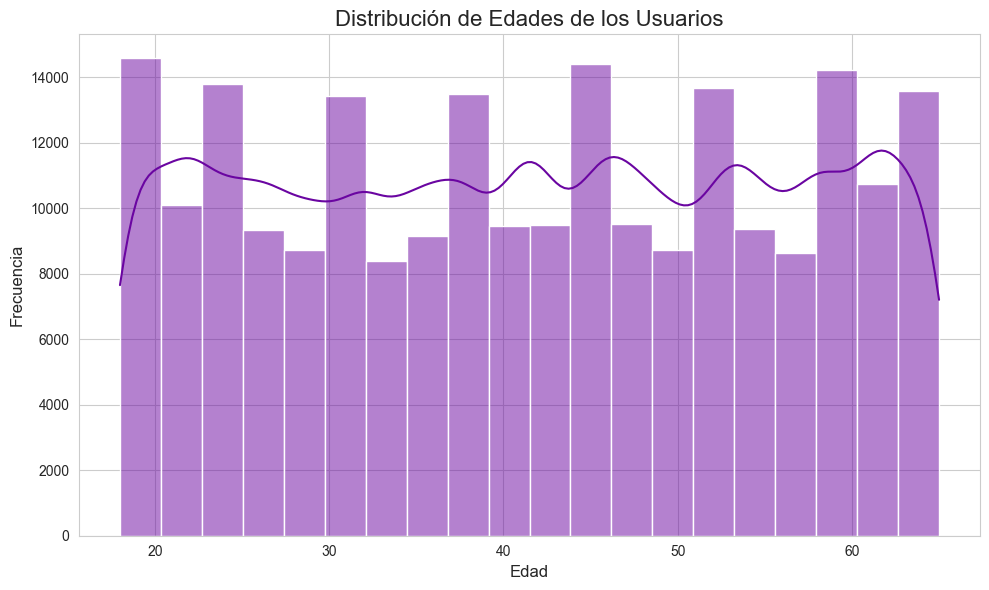

In [36]:

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df_final['age'], kde=True, bins=20, color='#6A05A1')
plt.title('Distribución de Edades de los Usuarios', fontsize=16)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.tight_layout()
plt.show()

No se tiene un "público principal" concentrado en una franja de edad, sino que atraes a usuarios de varias generaciones. 

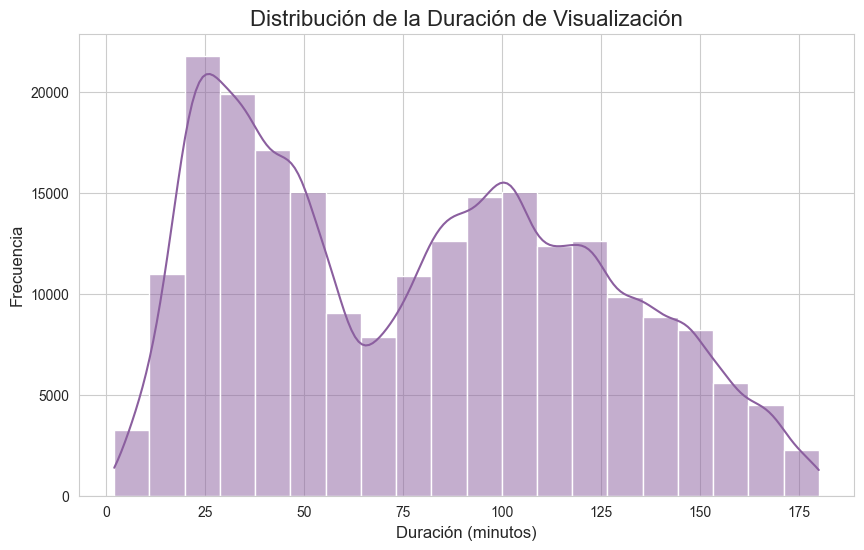

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(df_final['watch_duration_minutes'], kde=True, bins=20, color='#8B5F9F')
plt.title('Distribución de la Duración de Visualización', fontsize=16)
plt.xlabel('Duración (minutos)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()

* La mayoría de las sesiones de visualización son cortas (probablemente clips o inicios de episodios).

* A medida que la duración de las sesiones aumenta, el número de sesiones disminuye.

* Esto te dice que tienes un comportamiento de usuario dual: una gran cantidad de interacciones rápidas y un grupo más pequeño, pero muy comprometido, que ve contenido por períodos de tiempo mucho más largos.

C:\Users\yusel\AppData\Local\Temp\ipykernel_18076\992175127.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='subscription_type', data=df_final, palette='viridis', order=df_final['subscription_type'].value_counts().index)


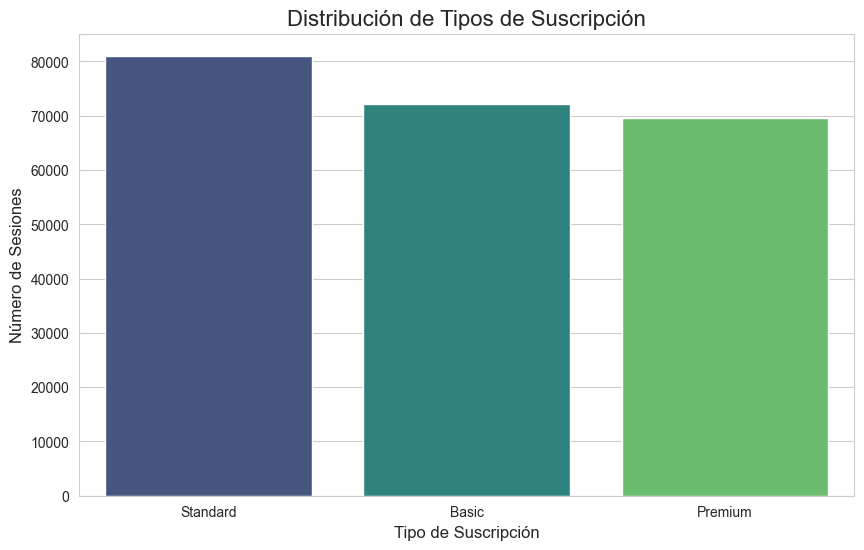

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(x='subscription_type', data=df_final, palette='viridis', order=df_final['subscription_type'].value_counts().index)
plt.title('Distribución de Tipos de Suscripción', fontsize=16)
plt.xlabel('Tipo de Suscripción', fontsize=12)
plt.ylabel('Número de Sesiones', fontsize=12)
plt.show()

C:\Users\yusel\AppData\Local\Temp\ipykernel_18076\3048903816.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='country', data=df_final, palette='plasma', order=top_countries)


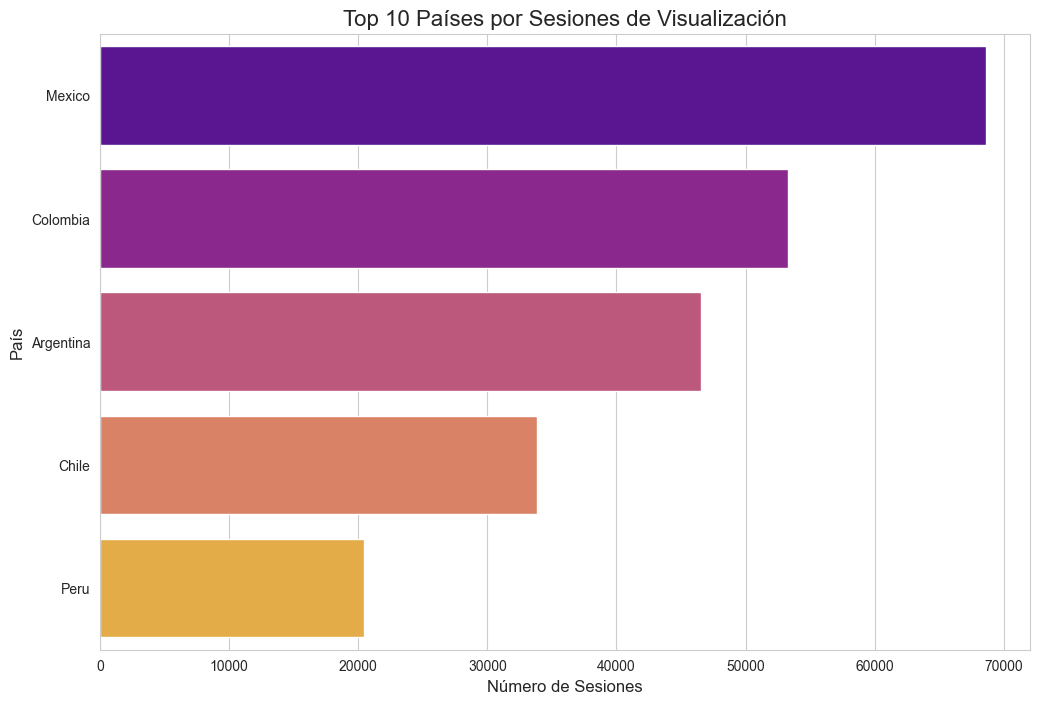

In [39]:
plt.figure(figsize=(12, 8))
top_countries = df_final['country'].value_counts().nlargest(10).index
sns.countplot(y='country', data=df_final, palette='plasma', order=top_countries)
plt.title('Top 10 Países por Sesiones de Visualización', fontsize=16)
plt.xlabel('Número de Sesiones', fontsize=12)
plt.ylabel('País', fontsize=12)
plt.show()

C:\Users\yusel\AppData\Local\Temp\ipykernel_18076\2441339281.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='device_type', data=df_final, palette='cividis', order=df_final['device_type'].value_counts().index)


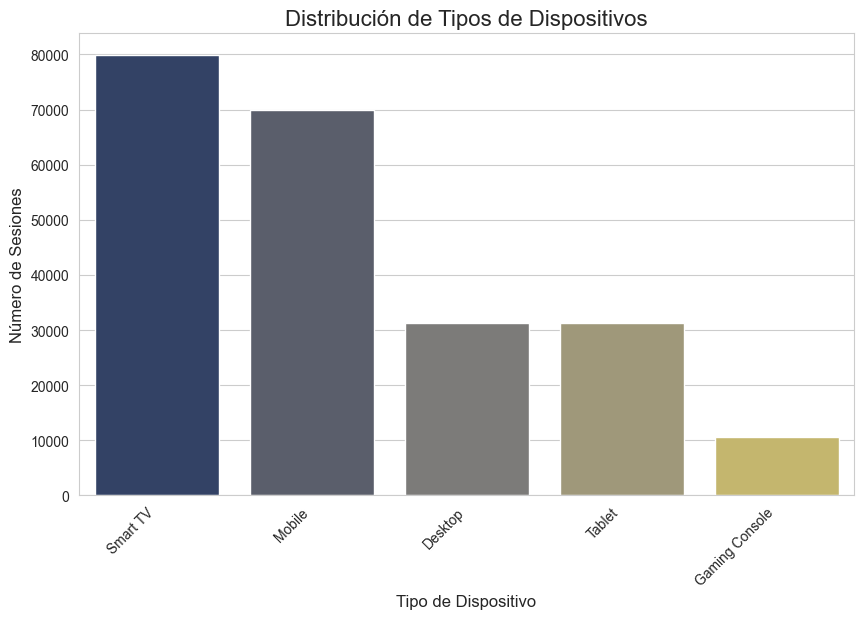

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(x='device_type', data=df_final, palette='cividis', order=df_final['device_type'].value_counts().index)
plt.title('Distribución de Tipos de Dispositivos', fontsize=16)
plt.xlabel('Tipo de Dispositivo', fontsize=12)
plt.ylabel('Número de Sesiones', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()